In [186]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import UnivariateSpline
from scipy.stats import linregress

### Наш эксперимент

In [187]:
data = pd.read_csv('our.csv')
data.N /= np.max(data.N)
data.head()
mask = (data.E > 1600)
MNK = linregress(data.E[mask], np.power(data.N[mask], 2))

Text(0.5, 1.0, 'CdSe')

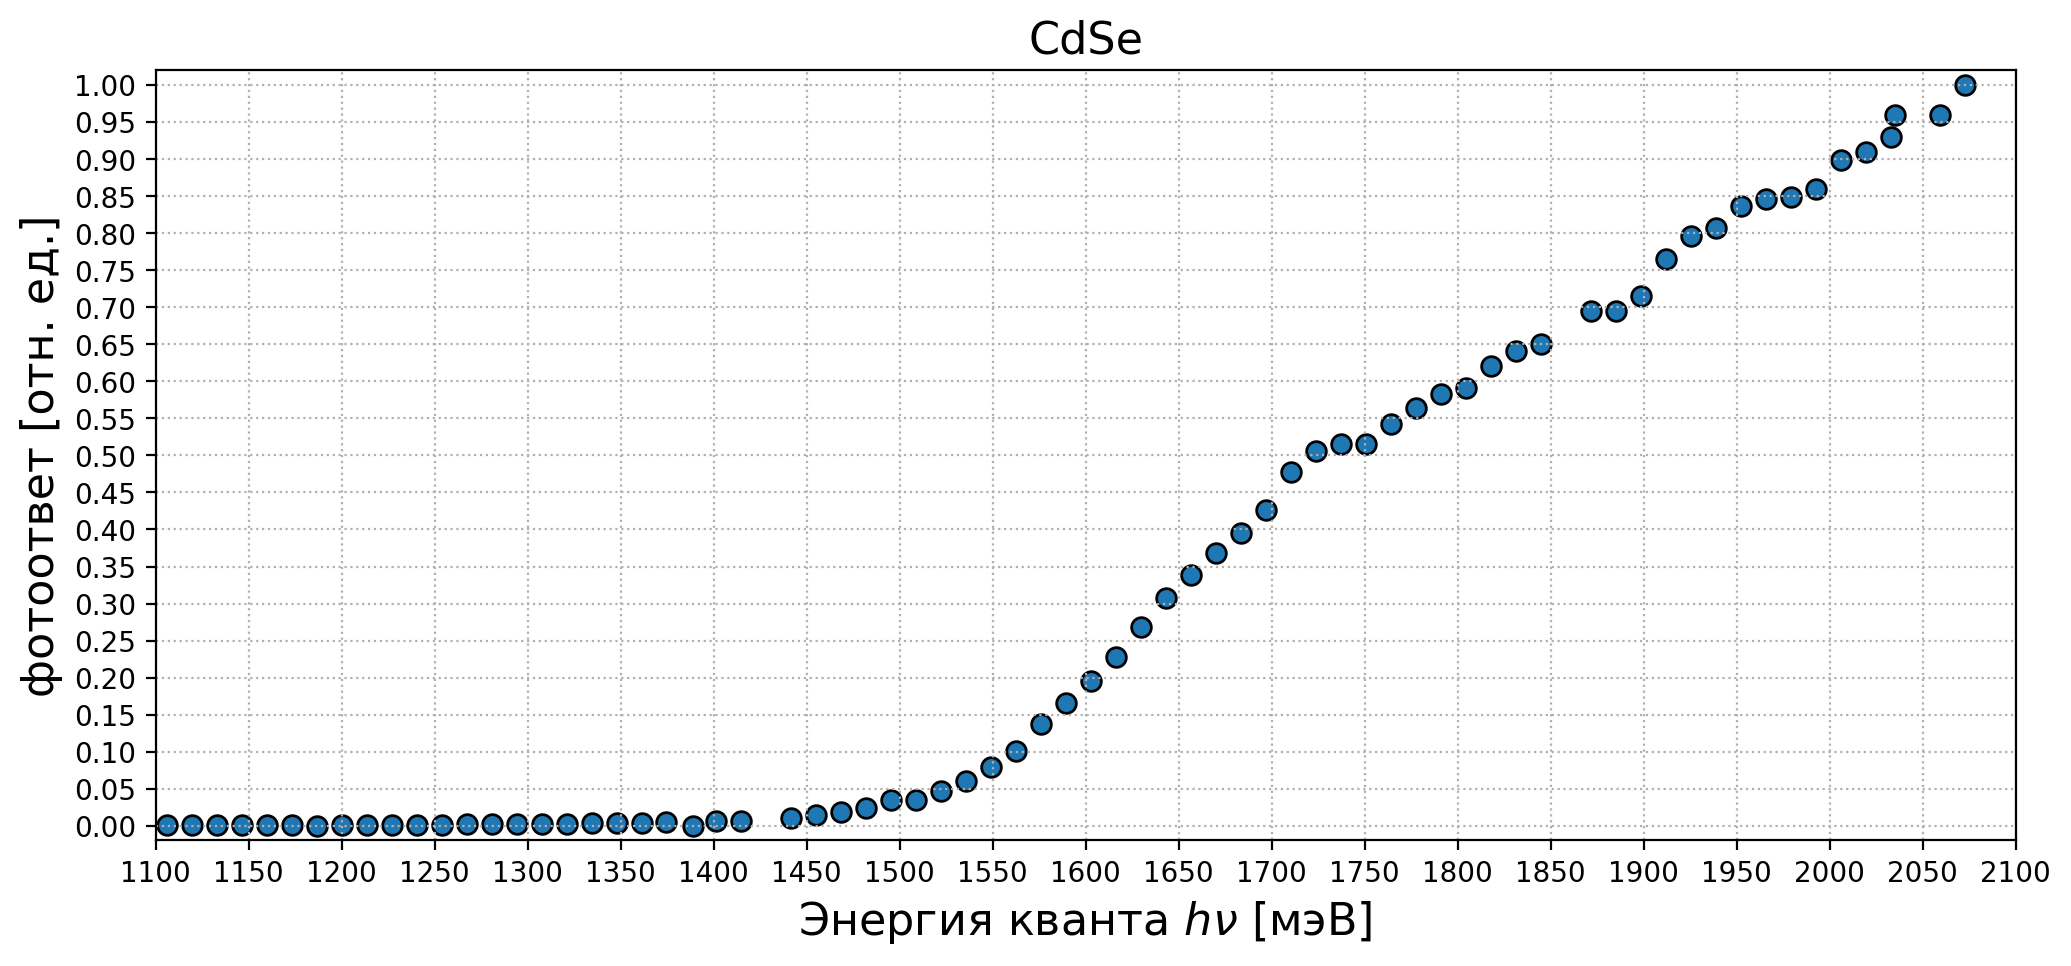

In [188]:
plt.figure(figsize=(12, 5), dpi = 200)
plt.scatter(data.E, data.N, s = 50, edgecolors='k')
plt.xlabel(r"Энергия кванта $h \nu$ [мэВ]", fontsize = 16)
plt.ylabel(r"фотоответ [отн. ед.]", fontsize = 16)
plt.grid(ls = ':')
plt.xticks(np.arange(1100, 2200, 50))
plt.yticks(np.arange(0, 1.1, 0.05))
plt.xlim(1100, 2100)
plt.ylim(-0.02, 1.02)
plt.title("CdSe", fontsize = 16)

1607.031886597762


<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_19349/1900233238.py:11: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x_line, MNK.slope * x_line + MNK.intercept, label = f'a = {MNK.slope:.5f} $\pm$ {MNK.stderr:.5f}\nb = {MNK.intercept:.2f} $\pm$ {MNK.intercept_stderr:.2f}')
/tmp/ipykernel_19349/1900233238.py:11: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x_line, MNK.slope * x_line + MNK.intercept, label = f'a = {MNK.slope:.5f} $\pm$ {MNK.stderr:.5f}\nb = {MNK.intercept:.2f} $\pm$ {MNK.intercept_stderr:.2f}')


Text(0.5, 1.0, 'Нахождение ширины запрещенной зоны')

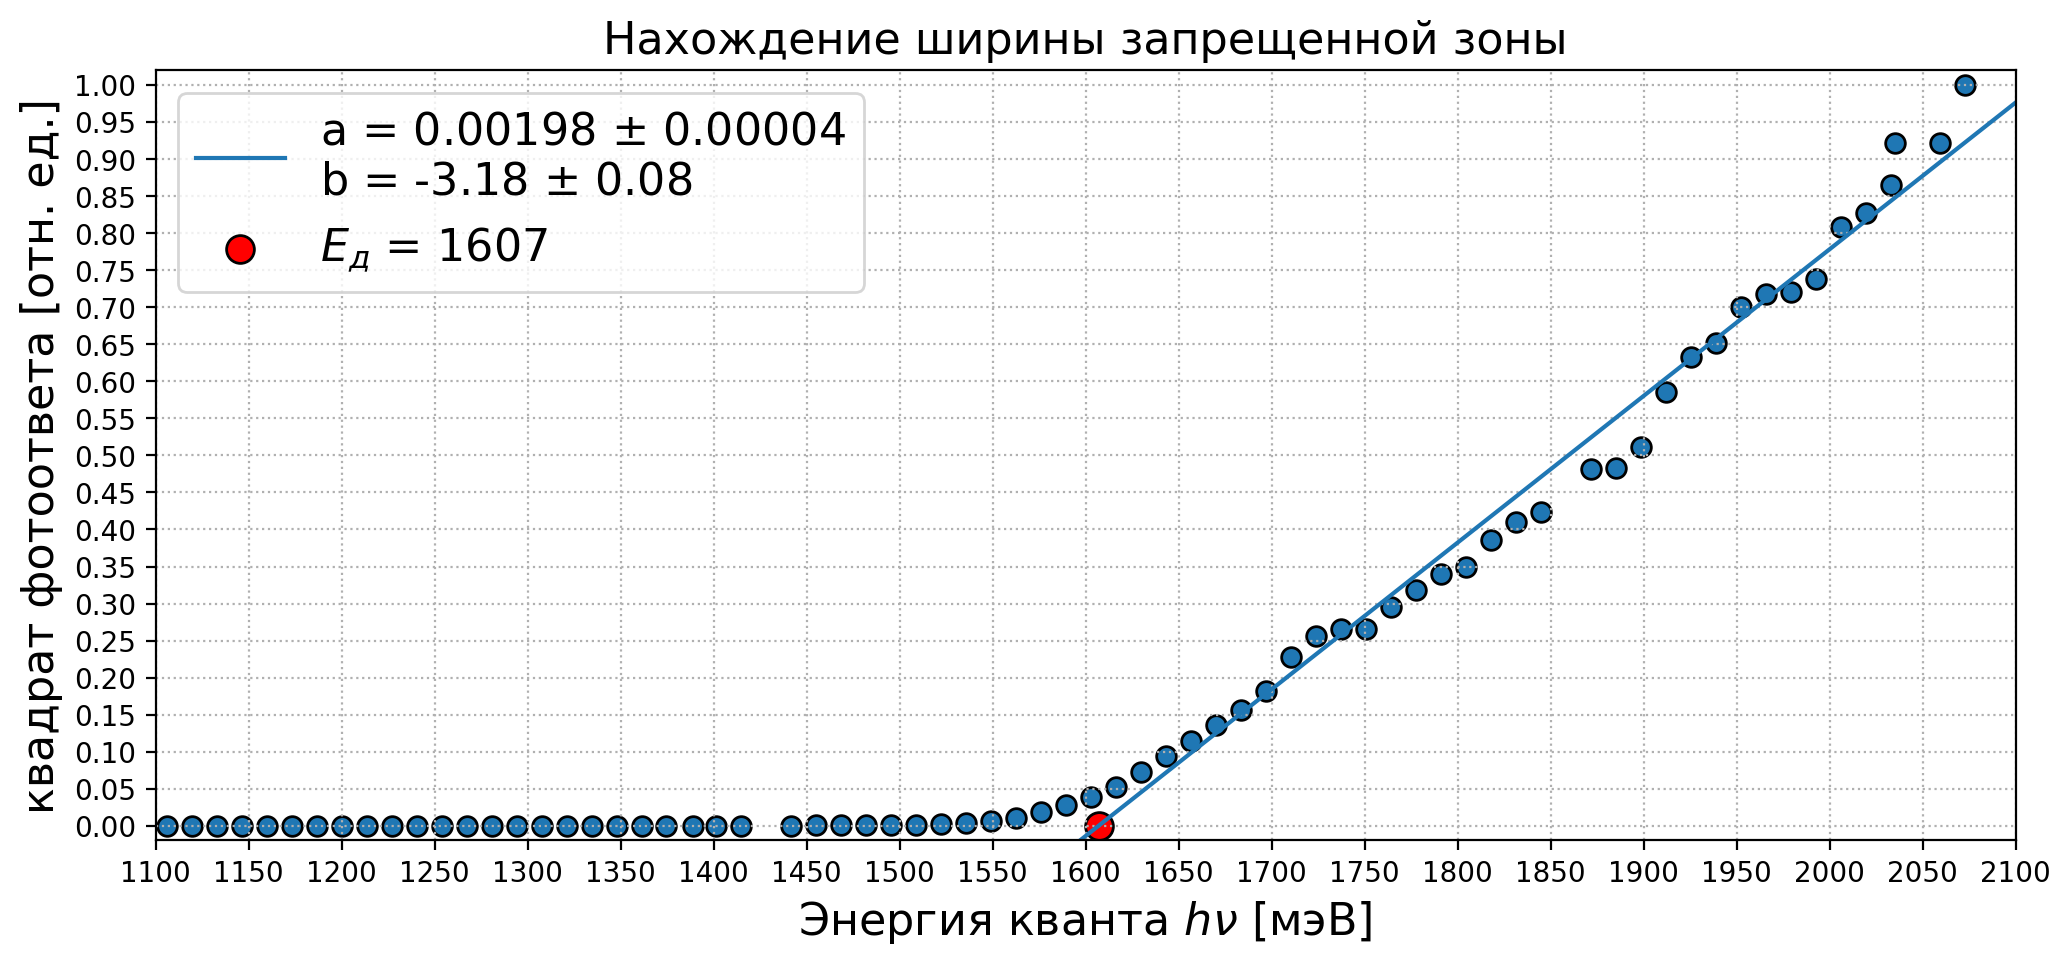

In [189]:
plt.figure(figsize=(12, 5), dpi = 200)
plt.scatter(data.E, np.power(data.N, 2), s = 50, edgecolors='k')
plt.xlabel(r"Энергия кванта $h \nu$ [мэВ]", fontsize = 16)
plt.ylabel(r"квадрат фотоответа [отн. ед.]", fontsize = 16)
plt.grid(ls = ':')
plt.xticks(np.arange(1100, 2200, 50))
plt.yticks(np.arange(0, 1.1, 0.05))
plt.xlim(1100, 2100)
plt.ylim(-0.02, 1.02)
x_line = np.linspace(1000, 2200, 1000)
plt.plot(x_line, MNK.slope * x_line + MNK.intercept, label = f'a = {MNK.slope:.5f} $\pm$ {MNK.stderr:.5f}\nb = {MNK.intercept:.2f} $\pm$ {MNK.intercept_stderr:.2f}')
plt.scatter([-MNK.intercept / MNK.slope], [0], color = 'red', edgecolors='k', label = f'$E_д$ = {-MNK.intercept / MNK.slope:.0f}', s = 100)
plt.legend(fontsize = 16)
print(-MNK.intercept / MNK.slope)
plt.title("Нахождение ширины запрещенной зоны", fontsize = 16)

### Не наш эксперимент

In [200]:
data_no_filter = pd.read_csv('si_filter.csv')
data = pd.read_csv('no_filter.csv')
data_no_filter.y /= np.max(data.y)
data.y /= np.max(data.y)
data_no_filter.tail()
mask = data.x < 2000
x_line = np.linspace(550, 2000, 1000)
s = 0.00005
interpolation_no_filter = UnivariateSpline(data.x, data.y, s = s)(x_line)
interpolation_filter = UnivariateSpline(data_no_filter.x, data_no_filter.y, s = s)(x_line)

Text(0.5, 0.98, 'Ge')

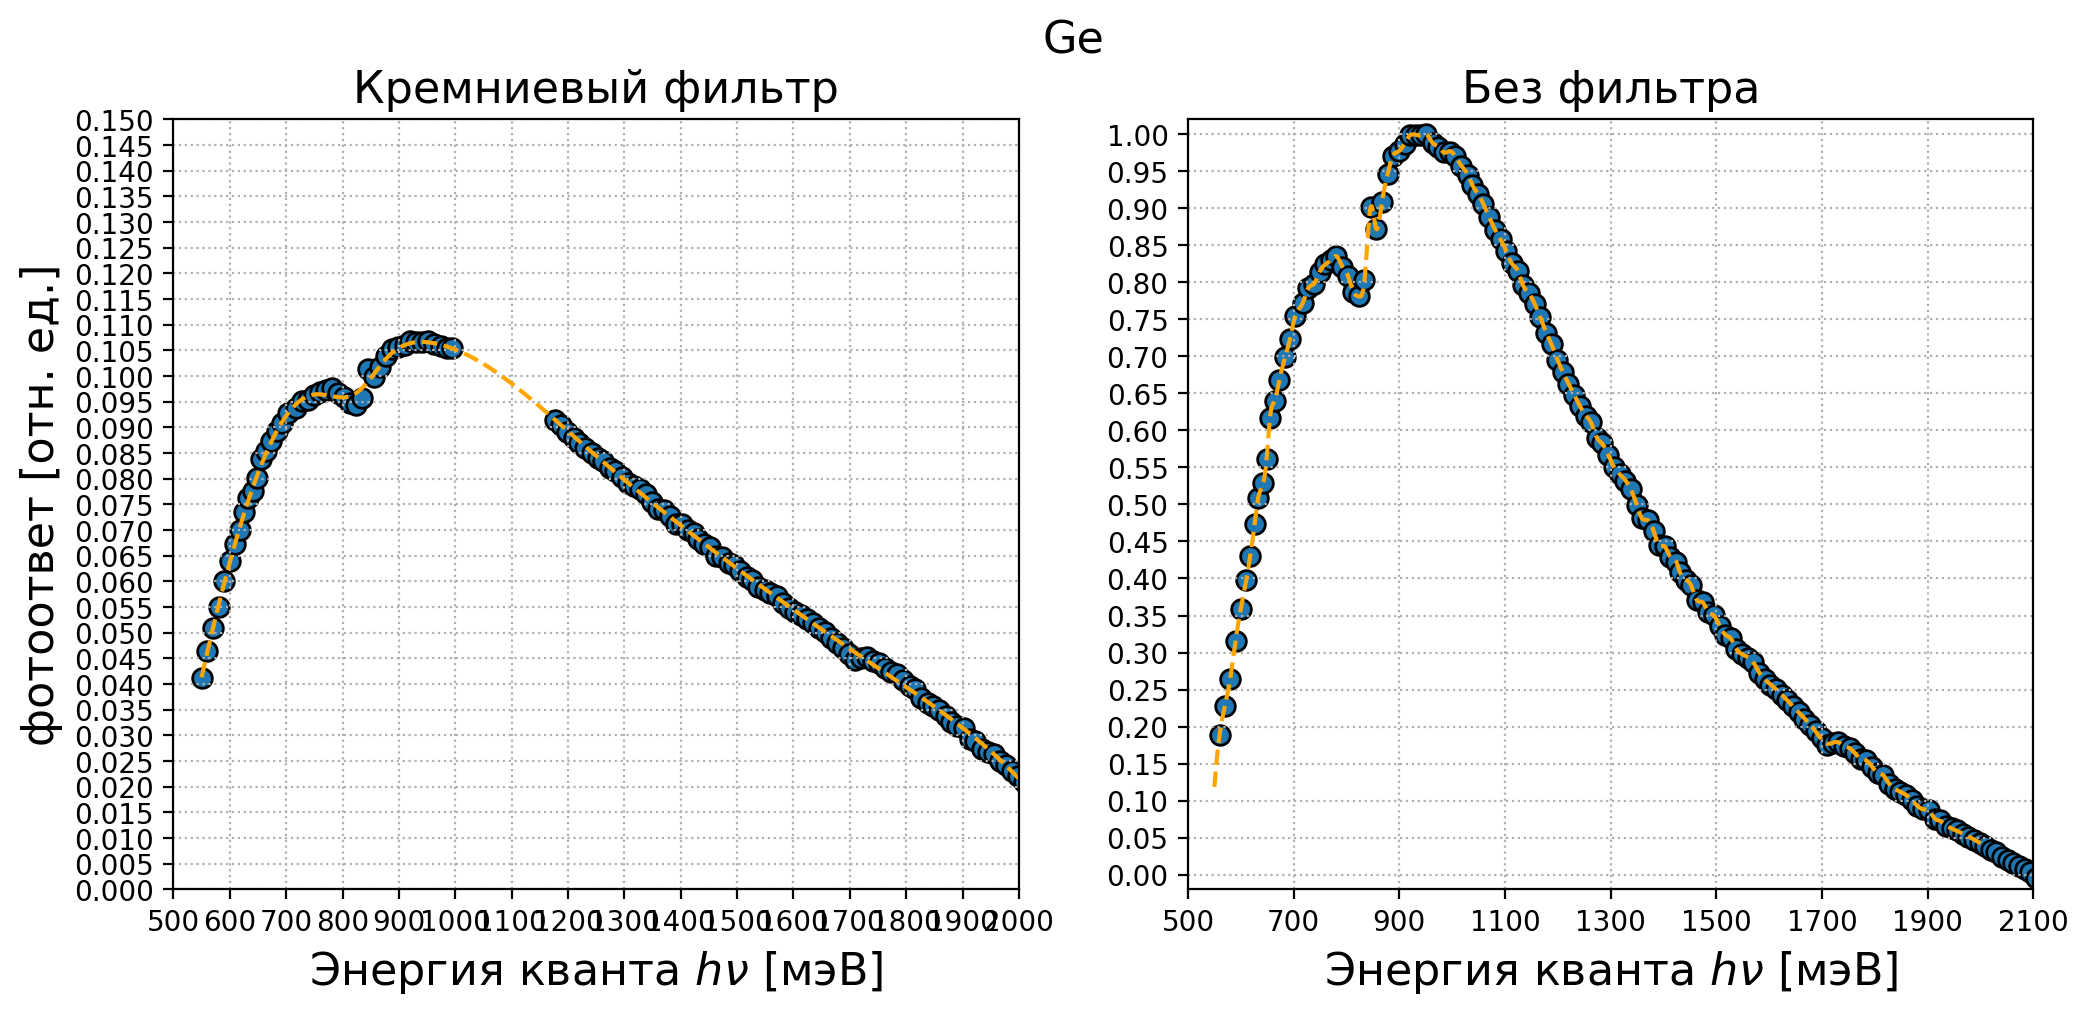

In [201]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), dpi = 200)
ax[1].plot(x_line, interpolation_no_filter, color = 'orange', linestyle = '--')
ax[0].plot(x_line, interpolation_filter, color = 'orange', linestyle = '--')
ax[0].scatter(data_no_filter.x, data_no_filter.y, s = 50, edgecolors='k')
ax[0].set_xlabel(r"Энергия кванта $h \nu$ [мэВ]", fontsize = 16)
ax[0].set_ylabel(r"фотоответ [отн. ед.]", fontsize = 16)
ax[0].grid(ls = ':')
ax[0].set_xticks(np.arange(100, 2200, 100))
ax[0].set_yticks(np.arange(0, 1.1, 0.005))
ax[0].set_xlim(500, 2000)

ax[1].scatter(data.x, data.y, s = 50, edgecolors='k')
ax[1].set_xlabel(r"Энергия кванта $h \nu$ [мэВ]", fontsize = 16)
# ax[1].set_ylabel(r"фотоответ [отн. ед.]", fontsize = 16)
ax[1].grid(ls = ':')
ax[1].set_xticks(np.arange(100, 2300, 200))
ax[1].set_yticks(np.arange(0, 1.1, 0.05))
ax[1].set_xlim(500, 2100)
ax[1].set_ylim(-0.02, 1.02)
ax[0].set_ylim(-0, 0.15)
ax[0].set_title("Кремниевый фильтр", fontsize = 16)
ax[1].set_title("Без фильтра", fontsize = 16)
fig.suptitle("Ge", fontsize = 16)

Text(0.5, 1.0, 'Si')

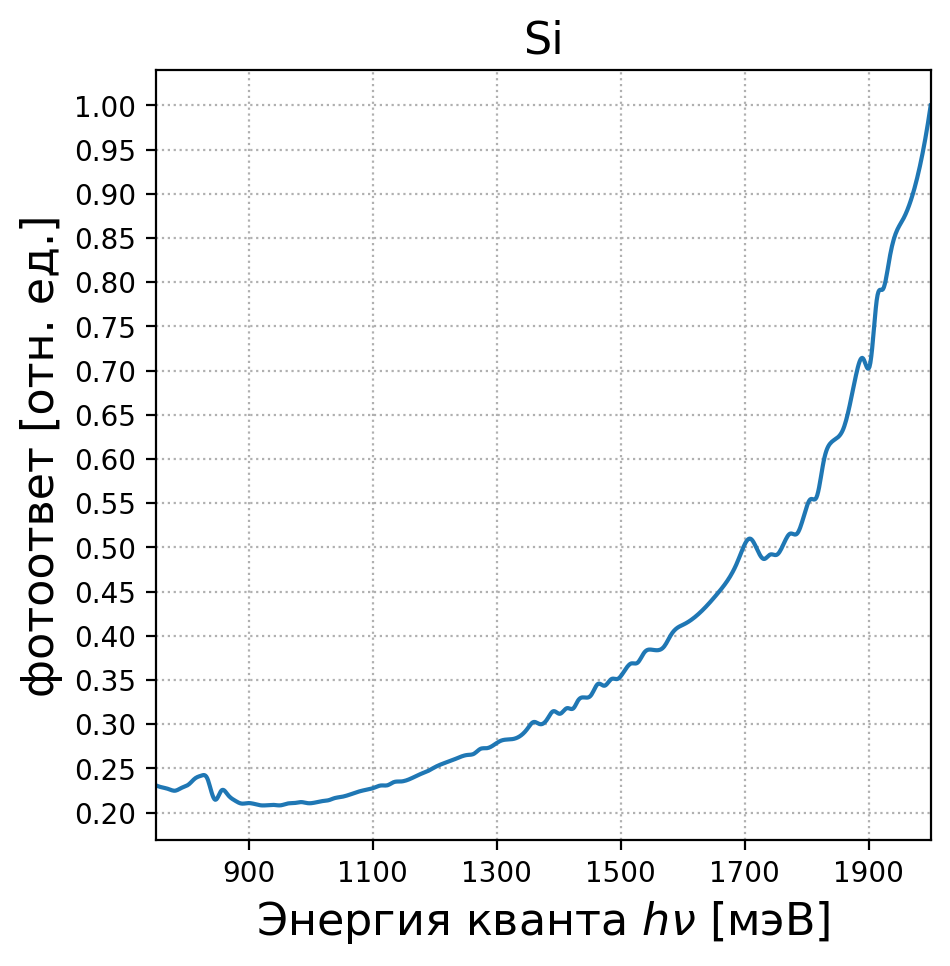

In [212]:
plt.figure(figsize=(5, 5), dpi = 200)

plt.xlabel(r"Энергия кванта $h \nu$ [мэВ]", fontsize = 16)
plt.ylabel(r"фотоответ [отн. ед.]", fontsize = 16)
plt.grid(ls = ':')
plt.xticks(np.arange(100, 2300, 200))
plt.yticks(np.arange(0, 1.1, 0.05))
plt.xlim(750, 2000)
si_data =  interpolation_no_filter / interpolation_filter 
si_data = si_data**(-1)
si_data /= np.max(si_data)
plt.plot(x_line, si_data)
plt.title("Si", fontsize = 16)

Text(0.5, 1.0, 'Si')

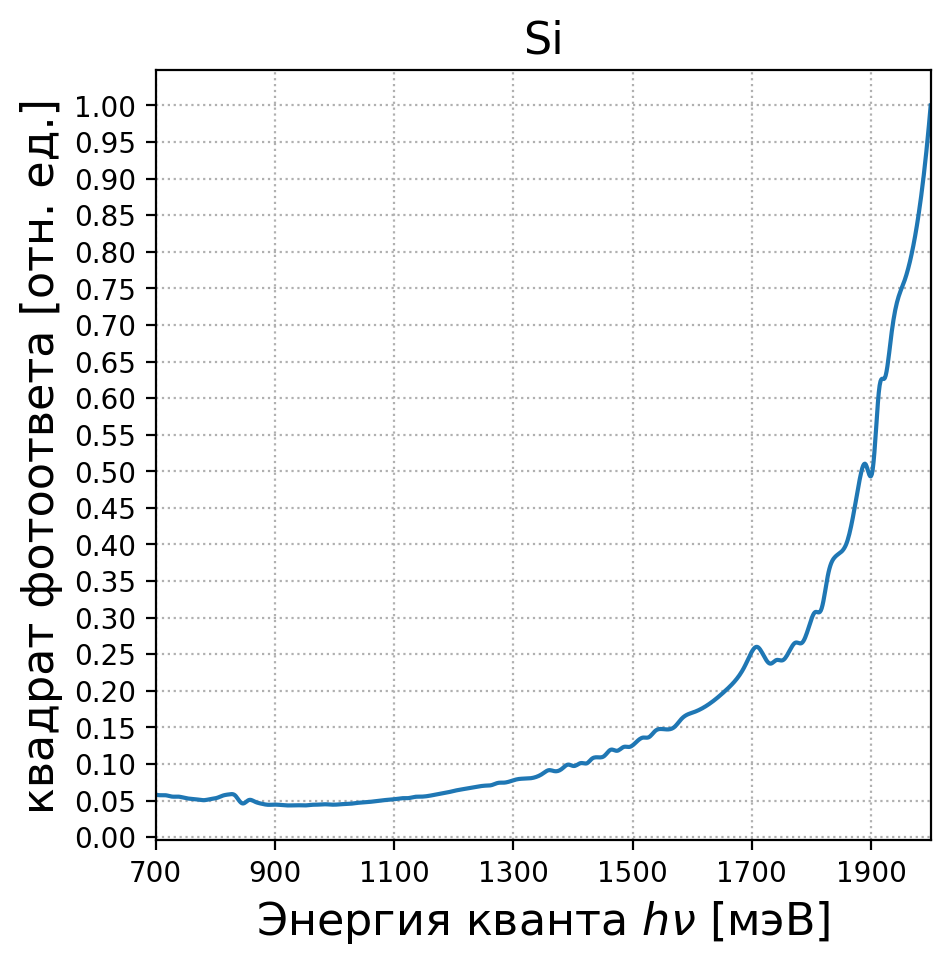

In [211]:
plt.figure(figsize=(5, 5), dpi = 200)

plt.xlabel(r"Энергия кванта $h \nu$ [мэВ]", fontsize = 16)
plt.ylabel(r"квадрат фотоответа [отн. ед.]", fontsize = 16)
plt.grid(ls = ':')
plt.xticks(np.arange(100, 2300, 200))
plt.yticks(np.arange(0, 1.1, 0.05))
plt.xlim(700, 2000)
plt.plot(x_line, np.power(si_data, 2))
plt.title("Si", fontsize = 16)

__Без фильтра__

653.4139839349159


<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_19349/1402303559.py:17: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x_line, MNK.slope * x_line + MNK.intercept, label = f'a = {MNK.slope:.5f} $\pm$ {MNK.stderr:.5f}\nb = {MNK.intercept:.2f} $\pm$ {MNK.intercept_stderr:.2f}')
/tmp/ipykernel_19349/1402303559.py:17: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x_line, MNK.slope * x_line + MNK.intercept, label = f'a = {MNK.slope:.5f} $\pm$ {MNK.stderr:.5f}\nb = {MNK.intercept:.2f} $\pm$ {MNK.intercept_stderr:.2f}')


Text(0.5, 1.0, 'Нахождение ширины запрещенной зоны Ge')

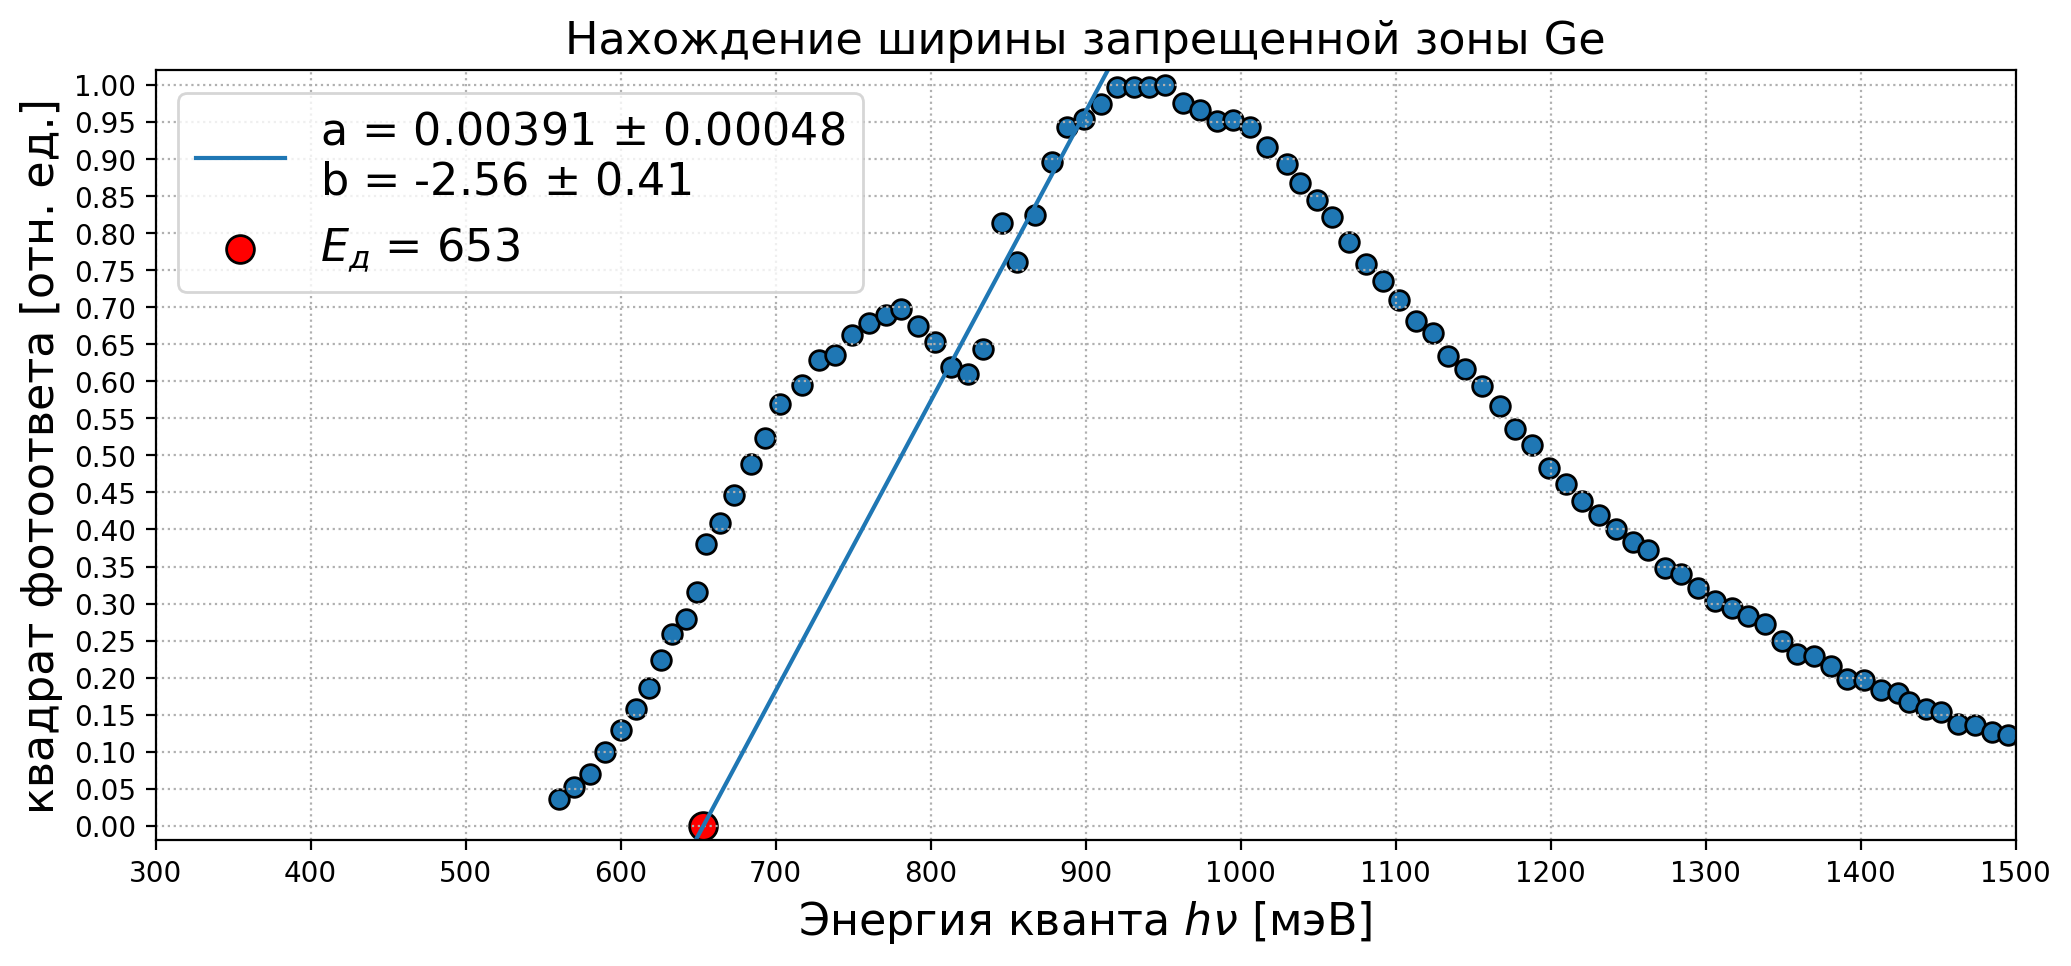

In [194]:
data = pd.read_csv('no_filter.csv')
data.y/=np.max(data.y)

mask = (data.x > 800) * (data.x < 900)

MNK = linregress(data.x[mask], np.power(data.y[mask], 2))
plt.figure(figsize=(12, 5), dpi = 200)
plt.scatter(data.x, np.power(data.y, 2), s = 50, edgecolors='k')
plt.xlabel(r"Энергия кванта $h \nu$ [мэВ]", fontsize = 16)
plt.ylabel(r"квадрат фотоответа [отн. ед.]", fontsize = 16)
plt.grid(ls = ':')
plt.xticks(np.arange(100, 2300, 100))
plt.yticks(np.arange(0, 1.1, 0.05))
plt.xlim(300, 1500)
plt.ylim(-0.02, 1.02)
x_line = np.linspace(300, 1000, 1000)
plt.plot(x_line, MNK.slope * x_line + MNK.intercept, label = f'a = {MNK.slope:.5f} $\pm$ {MNK.stderr:.5f}\nb = {MNK.intercept:.2f} $\pm$ {MNK.intercept_stderr:.2f}')
plt.scatter([-MNK.intercept / MNK.slope], [0], color = 'red', edgecolors='k', label = f'$E_д$ = {-MNK.intercept / MNK.slope:.0f}', s = 100)
plt.legend(fontsize = 16)
print(-MNK.intercept / MNK.slope)
plt.title("Нахождение ширины запрещенной зоны Ge", fontsize = 16)